# Import data

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
from scipy import stats

In [2]:
# Phase 1: Monthly data
sp500 = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1mo")
returns_monthly_df = np.log(sp500['Close'] / sp500['Close'].shift(1)).dropna()
returns_monthly = returns_monthly_df.values
dates_monthly = returns_monthly_df.index

print("Monthly Data:")
print(f"Observations: {len(returns_monthly)}")
print(f"Mean return: {returns_monthly.mean():.4f}")
print(f"Std dev: {returns_monthly.std():.4f}")
print("\n")

# Phase 2: Weekly
sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
returns_weekly_df = np.log(sp500_weekly['Close'] / sp500_weekly['Close'].shift(1)).dropna()
returns_weekly = returns_weekly_df.values
dates_weekly = returns_weekly_df.index

print("Weekly Data:")
print(f"Observations: {len(returns_weekly)}")
print(f"Mean return: {returns_weekly.mean():.4f}")
print(f"Std dev: {returns_weekly.std():.4f}")
print("\n")

# Phase 3: Daily
sp500_daily = yf.download("^GSPC", start="2007-01-01", end="2025-12-01", interval="1d")
returns_daily_df = np.log(sp500_daily['Close'] / sp500_daily['Close'].shift(1)).dropna()
returns_daily = returns_daily_df.values
dates_daily = returns_daily_df.index

print("Daily Data:")
print(f"Observations: {len(returns_daily)}")
print(f"Mean return: {returns_daily.mean():.4f}")
print(f"Std dev: {returns_daily.std():.4f}")

/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/35843677.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/35843677.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_weekly = yf.download("^GSPC", start="2009-01-01", end="2019-12-31", interval="1wk")
[*********************100%***********************]  1 of 1 completed
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/35843677.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500_daily = yf.download("^GSPC", start="2007-01-01", end="2025-12-01", interval="1d")


Monthly Data:
Observations: 131
Mean return: 0.0104
Std dev: 0.0382


Weekly Data:
Observations: 573
Mean return: 0.0022
Std dev: 0.0206




[*********************100%***********************]  1 of 1 completed

Daily Data:
Observations: 4757
Mean return: 0.0003
Std dev: 0.0126


# Phase 1 - Monthly data

## Data exploration

In [3]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

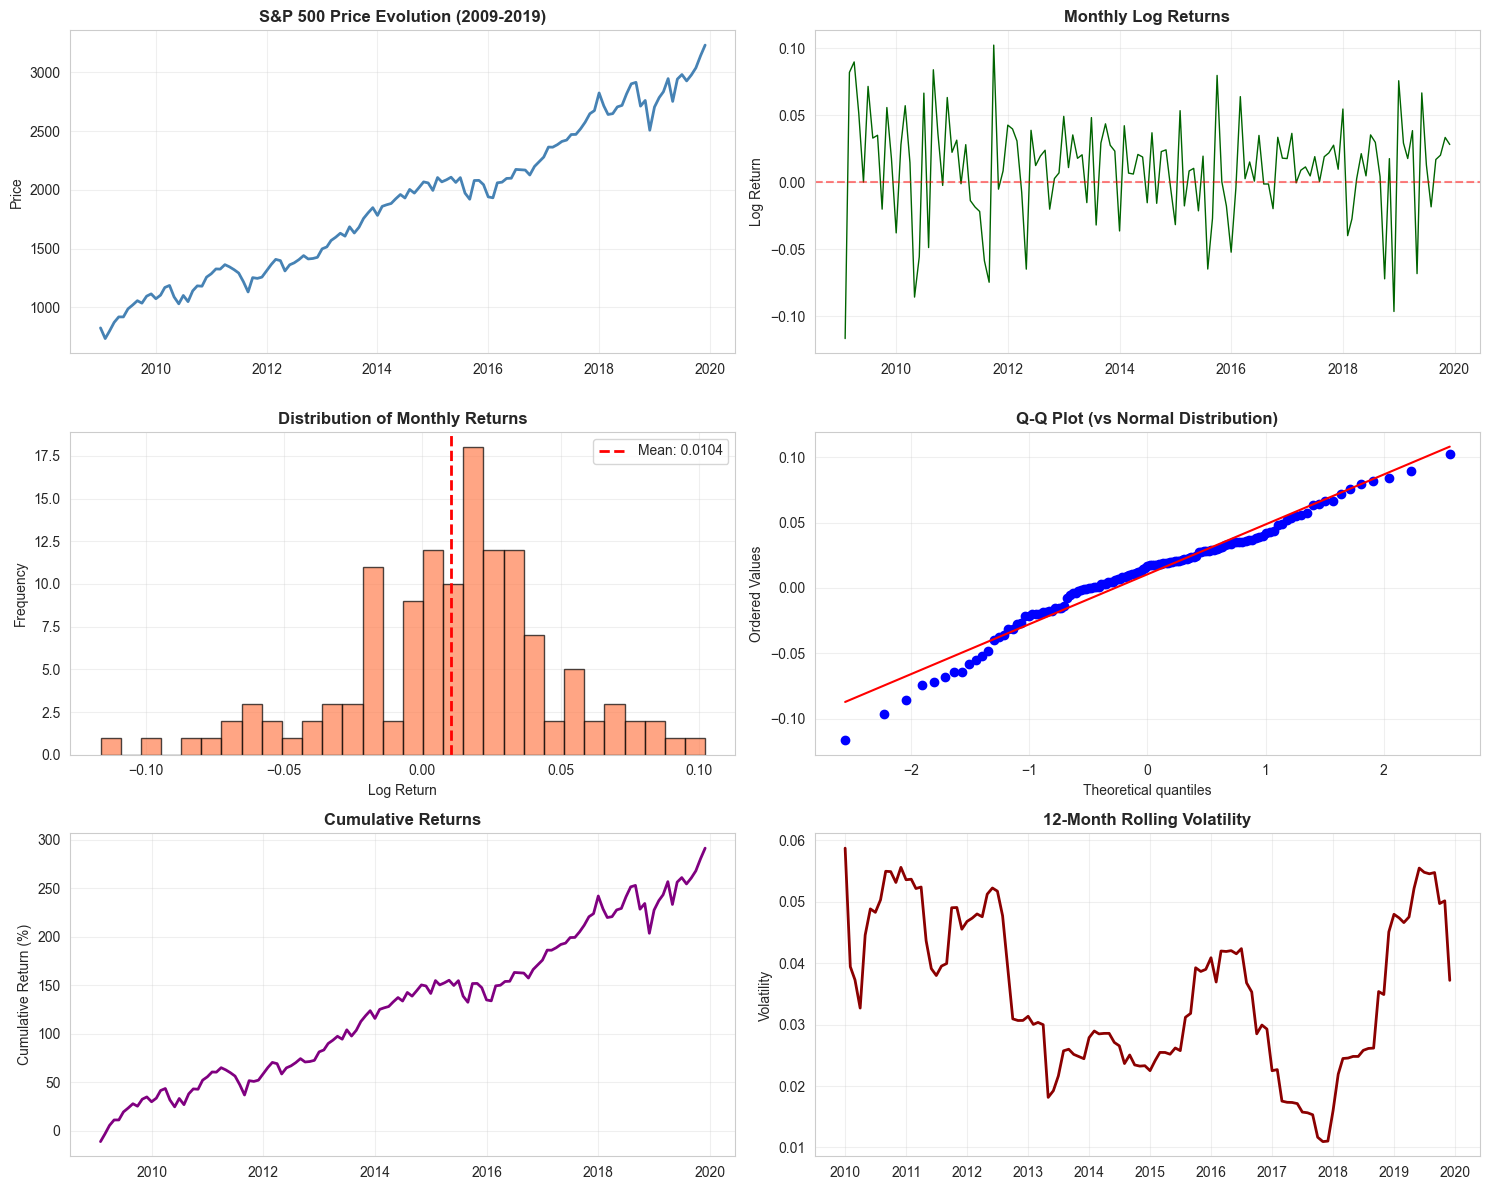


✓ Exploratory plots saved to 'phase1_exploratory.png'


In [4]:
# Create comprehensive exploratory plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# 1. Price evolution
axes[0, 0].plot(sp500.index, sp500['Close'], color='steelblue', linewidth=2)
axes[0, 0].set_title('S&P 500 Price Evolution (2009-2019)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price')
axes[0, 0].grid(True, alpha=0.3)

# 2. Log returns over time
axes[0, 1].plot(dates_monthly, returns_monthly, color='darkgreen', linewidth=1)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Monthly Log Returns', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Log Return')
axes[0, 1].grid(True, alpha=0.3)

# 3. Distribution of returns
axes[1, 0].hist(returns_monthly, bins=30, color='coral', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(returns_monthly.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {returns_monthly.mean():.4f}')
axes[1, 0].set_title('Distribution of Monthly Returns', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Log Return')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Q-Q plot (check for normality)
returns_array = np.array(returns_monthly).flatten()  # Convert to 1D numpy array
stats.probplot(returns_array, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (vs Normal Distribution)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# 5. Cumulative returns
cumulative_returns = np.exp(np.cumsum(returns_monthly)) - 1
axes[2, 0].plot(dates_monthly, cumulative_returns * 100, color='purple', linewidth=2)
axes[2, 0].set_title('Cumulative Returns', fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel('Cumulative Return (%)')
axes[2, 0].grid(True, alpha=0.3)

# 6. Rolling volatility (12-month window)
rolling_vol = returns_monthly_df.rolling(window=12).std()
axes[2, 1].plot(rolling_vol.index, rolling_vol.values, color='darkred', linewidth=2)
axes[2, 1].set_title('12-Month Rolling Volatility', fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel('Volatility')
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('phase1_exploratory.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Exploratory plots saved to 'phase1_exploratory.png'")


In [5]:
# Detailed statistics
print("\n" + "="*50)
print("STATISTICAL SUMMARY")
print("="*50)

print(f"\nBasic Statistics:")
print(f"  Count:        {len(returns_monthly)}")
print(f"  Mean:         {returns_monthly.mean():.6f}")
print(f"  Median:       {np.median(returns_monthly):.6f}")
print(f"  Std Dev:      {returns_monthly.std():.6f}")
print(f"  Min:          {returns_monthly.min():.6f} (on {dates_monthly[returns_monthly.argmin()].date()})")
print(f"  Max:          {returns_monthly.max():.6f} (on {dates_monthly[returns_monthly.argmax()].date()})")

print(f"\nDistribution Properties:")
print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
print(f"  Excess Kurt:  {float(stats.kurtosis(returns_monthly, fisher=True)):.4f}")

# Test for normality
_, p_value = stats.shapiro(returns_monthly)
print(f"\nShapiro-Wilk Test (Normality):")
print(f"  p-value:      {p_value:.6f}")
print(f"  Result:       {'❌ NOT Normal' if p_value < 0.05 else '✓ Approximately Normal'}")

print(f"\nPercentiles:")
for p in [1, 5, 25, 50, 75, 95, 99]:
    print(f"  {p:2d}th:         {np.percentile(returns_monthly, p):.6f}")



STATISTICAL SUMMARY

Basic Statistics:
  Count:        131
  Mean:         0.010412
  Median:       0.017035
  Std Dev:      0.038184
  Min:          -0.116457 (on 2009-02-01)
  Max:          0.102307 (on 2011-10-01)

Distribution Properties:
  Skewness:     -0.5669
  Kurtosis:     0.8376
  Excess Kurt:  0.8376

Shapiro-Wilk Test (Normality):
  p-value:      0.006693
  Result:       ❌ NOT Normal

Percentiles:
   1th:         -0.093045
   5th:         -0.064662
  25th:         -0.006299
  50th:         0.017035
  75th:         0.033245
  95th:         0.069090
  99th:         0.088019


/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/1501247057.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Skewness:     {float(stats.skew(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/1501247057.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"  Kurtosis:     {float(stats.kurtosis(returns_monthly)):.4f}")
/var/folders/kv/zt7j48t16bxdjlpfww8l32t00000gn/T/ipykernel_49739/1501247057.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array befor

## Linear regression

In [ ]:
# Prepare data for trend model
# Use time index (0, 1, 2, ..., 130) instead of dates
t = np.arange(len(returns_monthly))
cumulative_log_price = np.cumsum(returns_monthly)  # Cumulative log returns ≈ log price

print("Model 1.1: Linear Trend")
print("-" * 50)

with pm.Model() as model_1_1:
    # Priors (broad, uninformative)
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # Linear model
    mu = intercept + slope * t
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=cumulative_log_price)
    
    # Sample
    trace_1_1 = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True)

# Diagnostics
print("\n✓ Sampling complete!")
az.summary(trace_1_1, var_names=["slope", "intercept", "sigma"])

Model 1.1: Linear Trend
--------------------------------------------------


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 3 seconds.



✓ Sampling complete!


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.009,0.000,0.009,0.010,0.0,0.0,3762.0,3582.0,1.0
intercept,0.165,0.012,0.143,0.186,0.0,0.0,3903.0,4193.0,1.0
sigma,0.066,0.004,0.059,0.074,0.0,0.0,4885.0,4402.0,1.0


The Bayesian linear trend model identified a monthly growth rate of 0.009 (94% HDI: [0.009, 0.010]), equivalent to an annualized return of approximately 10.8%. The model converged successfully (r̂ = 1.0) with over 3,700 effective samples, indicating reliable posterior estimates. The residual volatility (σ = 0.067) suggests moderate dispersion around the trend, consistent with typical equity market behavior during this period.

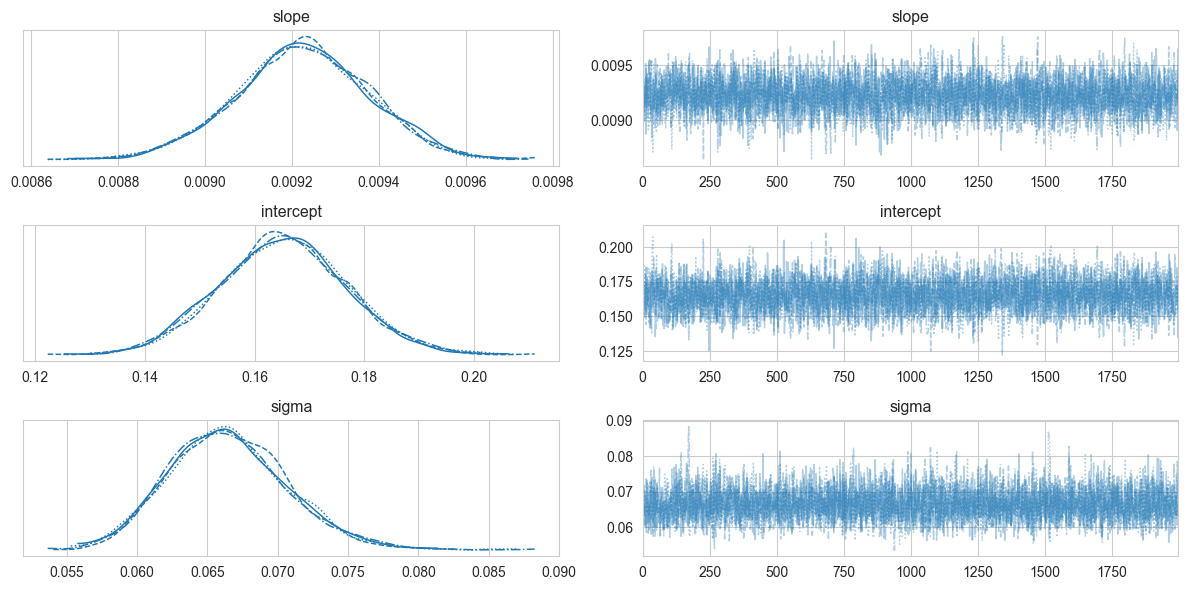

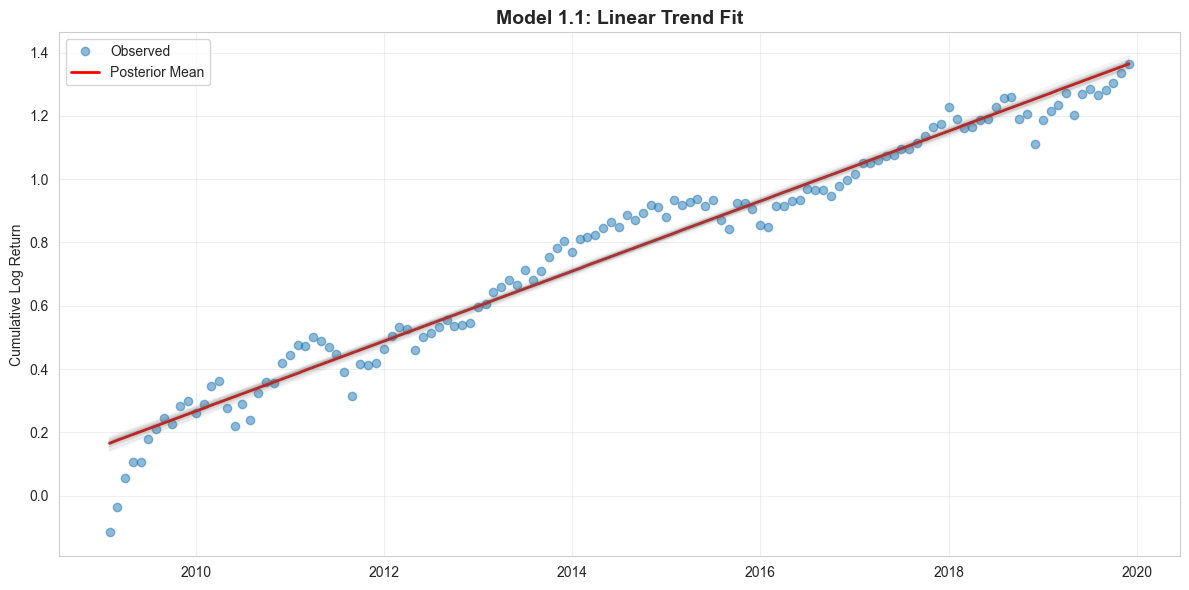


✓ Model 1.1 complete! Check your plots.


In [11]:
# Plot trace diagnostics
az.plot_trace(trace_1_1, var_names=["slope", "intercept", "sigma"])
plt.tight_layout()
plt.savefig('model_1_1_trace.png', dpi=300)
plt.show()

# Plot posterior predictive
fig, ax = plt.subplots(figsize=(12, 6))

# Data
ax.plot(dates_monthly, cumulative_log_price, 'o', label='Observed', alpha=0.5)

# Posterior mean
posterior_mean = trace_1_1.posterior["intercept"].mean().values + \
                 trace_1_1.posterior["slope"].mean().values * t
ax.plot(dates_monthly, posterior_mean, 'r-', linewidth=2, label='Posterior Mean')

# Posterior samples (uncertainty)
for i in range(100):
    slope_sample = trace_1_1.posterior["slope"].values.flatten()[i]
    intercept_sample = trace_1_1.posterior["intercept"].values.flatten()[i]
    ax.plot(dates_monthly, intercept_sample + slope_sample * t, 'gray', alpha=0.02)

ax.set_title('Model 1.1: Linear Trend Fit', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('model_1_1_fit.png', dpi=300)
plt.show()

print("\n✓ Model 1.1 complete! Check your plots.")

## Include changepoints

In [12]:
print("\nModel 1.2: Linear Trend with Changepoint")
print("-" * 50)

with pm.Model() as model_1_2:
    # Priors
    slope = pm.Normal("slope", mu=0, sigma=10)
    intercept = pm.Normal("intercept", mu=0, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    
    # Changepoint detection
    changepoint_idx = pm.DiscreteUniform("changepoint_idx", lower=12, upper=len(t)-12)
    slope_adjustment = pm.Normal("slope_adjustment", mu=0, sigma=0.5)
    
    # Build piecewise linear function
    # Before changepoint: slope
    # After changepoint: slope + slope_adjustment
    k = slope + slope_adjustment * (t >= changepoint_idx)
    
    # Ensure continuity at changepoint
    m = intercept - slope_adjustment * changepoint_idx * (t >= changepoint_idx)
    
    mu = m + k * t
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=cumulative_log_price)
    
    # Sample (use Metropolis-Hastings for discrete variable)
    trace_1_2 = pm.sample(2000, tune=1000, random_seed=42, return_inferencedata=True)

print("\n✓ Sampling complete!")
az.summary(trace_1_2, var_names=["slope", "changepoint_idx", "slope_adjustment"])



Model 1.2: Linear Trend with Changepoint
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [slope, intercept, sigma, slope_adjustment]
>Metropolis: [changepoint_idx]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



✓ Sampling complete!


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.011,0.000,0.011,0.012,0.000,0.000,700.0,1541.0,1.01
changepoint_idx,63.043,3.663,56.000,69.000,0.219,0.136,283.0,306.0,1.01
slope_adjustment,-0.004,0.001,-0.005,-0.003,0.000,0.000,2038.0,2734.0,1.00



📍 Detected changepoint at: 2014-04-01
   (Index: 62)


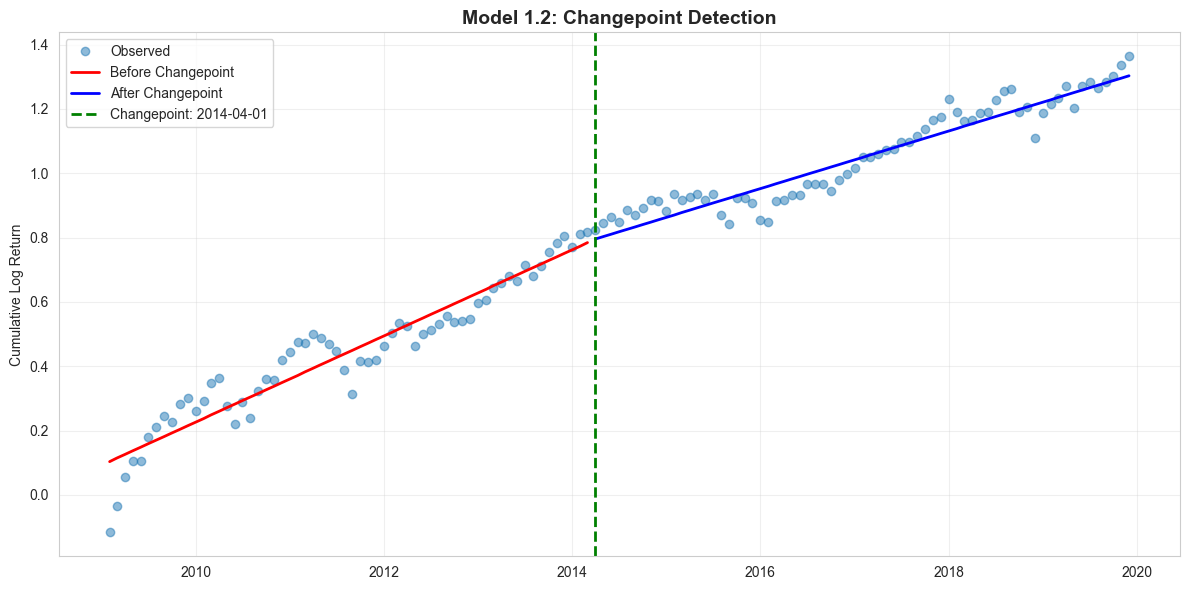

In [13]:
# Get MAP estimate of changepoint
changepoint_samples = trace_1_2.posterior["changepoint_idx"].values.flatten()
changepoint_map = int(stats.mode(changepoint_samples)[0])
changepoint_date = dates_monthly[changepoint_map]

print(f"\n📍 Detected changepoint at: {changepoint_date.date()}")
print(f"   (Index: {changepoint_map})")

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(dates_monthly, cumulative_log_price, 'o', label='Observed', alpha=0.5)

# Posterior mean fit
slope_mean = trace_1_2.posterior["slope"].mean().values
intercept_mean = trace_1_2.posterior["intercept"].mean().values
adjustment_mean = trace_1_2.posterior["slope_adjustment"].mean().values

mu_before = intercept_mean + slope_mean * t[:changepoint_map]
k_after = slope_mean + adjustment_mean
m_after = intercept_mean - adjustment_mean * changepoint_map
mu_after = m_after + k_after * t[changepoint_map:]

ax.plot(dates_monthly[:changepoint_map], mu_before, 'r-', linewidth=2, label='Before Changepoint')
ax.plot(dates_monthly[changepoint_map:], mu_after, 'b-', linewidth=2, label='After Changepoint')
ax.axvline(changepoint_date, color='green', linestyle='--', linewidth=2, label=f'Changepoint: {changepoint_date.date()}')

ax.set_title('Model 1.2: Changepoint Detection', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('model_1_2_changepoint.png', dpi=300)
plt.show()


### Add more changepoints

In [17]:
print("\nModel 1.2b: Multiple Changepoints with Laplace Regularization")
print("-" * 50)

with pm.Model() as model_1_2b:
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Changepoints
    n_changepoints = int(np.ceil(len(returns_monthly) / 12))
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # Build indicator matrix: which changepoints affect which time points?
    # changepoint_matrix[i, j] = 1 if changepoint j has occurred by time i
    changepoint_times = np.arange(1, n_changepoints + 1) * 12
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # Cumulative slope adjustments
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    
    # Intercept adjustments (maintaining continuity)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    
    # Trend
    mu_trend = k * t + m
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma, observed=cumulative_log_price)
    
    trace_1_2b = pm.sample(2000, tune=1000, random_seed=42,
                            return_inferencedata=True,
                            idata_kwargs={"log_likelihood": True})

print("\n✓ Sampling complete!")

# Summary
print("\nPosterior Summary:")
az.summary(trace_1_2b, var_names=["slope", "intercept", "sigma", "tau"])

# Check which changepoints are "active" (non-zero adjustments)
print("\nChangepoint Adjustments:")
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
print(adjustment_summary)

# Count significant changepoints (where 94% HDI doesn't include zero)
significant_cps = []
for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)
        
print(f"\n✓ Significant changepoints detected: {len(significant_cps)} out of {n_changepoints}")
print(f"  At year indices: {significant_cps}")

Initializing NUTS using jitter+adapt_diag...



Model 1.2b: Multiple Changepoints with Laplace Regularization
--------------------------------------------------


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 93 seconds.



✓ Sampling complete!

Posterior Summary:

Changepoint Adjustments:
                  mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
adjustments[0]  -0.016  0.004  -0.022   -0.008        0.0    0.000    3871.0   
adjustments[1]  -0.006  0.004  -0.013    0.001        0.0    0.000    4289.0   
adjustments[2]   0.009  0.003   0.003    0.015        0.0    0.000    4135.0   
adjustments[3]   0.005  0.003  -0.001    0.011        0.0    0.000    4252.0   
adjustments[4]  -0.008  0.003  -0.014   -0.002        0.0    0.000    4843.0   
adjustments[5]  -0.012  0.003  -0.019   -0.006        0.0    0.000    5450.0   
adjustments[6]   0.015  0.003   0.009    0.021        0.0    0.000    5506.0   
adjustments[7]   0.001  0.003  -0.005    0.007        0.0    0.000    4695.0   
adjustments[8]  -0.012  0.003  -0.018   -0.005        0.0    0.000    4128.0   
adjustments[9]   0.011  0.005   0.002    0.019        0.0    0.000    5028.0   
adjustments[10]  0.001  0.019  -0.032    0.036      


Visualizing Model 1.2b results...

✓ Detected 7 significant changepoints
  At year indices: [0, 2, 4, 5, 6, 8, 9]


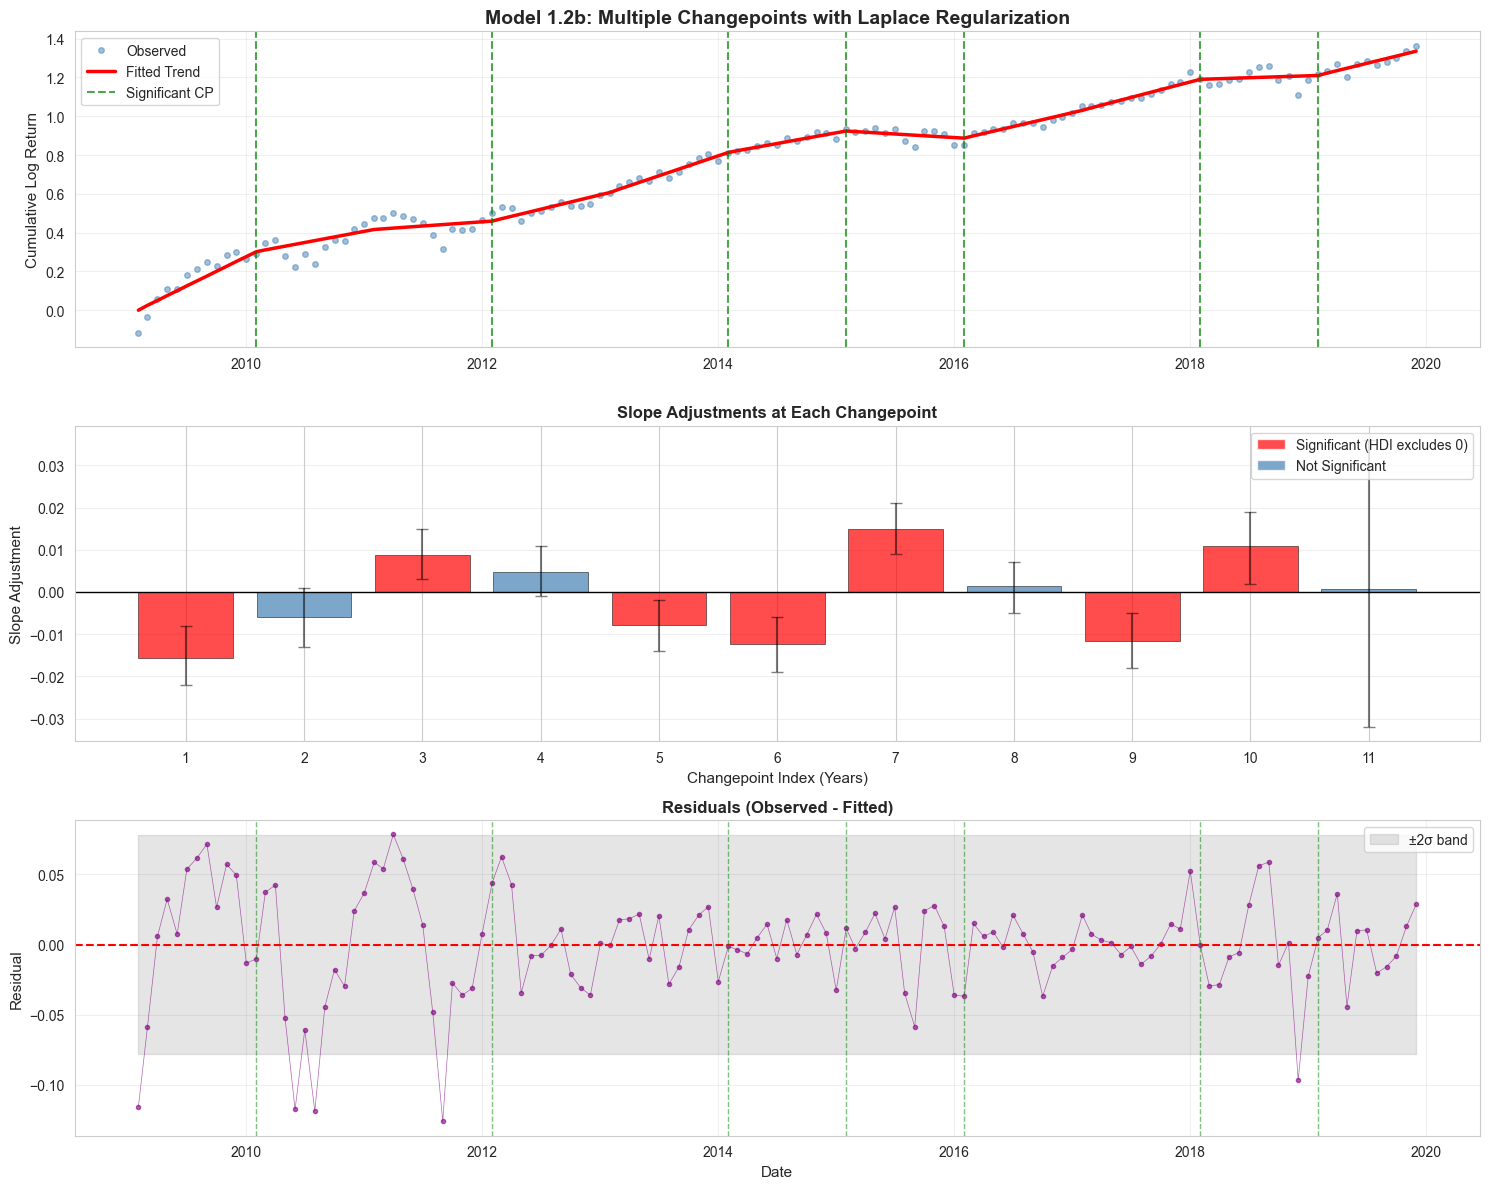


✓ Plots saved to 'model_1_2b_full_analysis.png'


In [19]:
print("\nVisualizing Model 1.2b results...")

# Extract posterior means
slope_mean = float(trace_1_2b.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2b.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2b.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2b.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2b.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2b, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2b: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2b_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'model_1_2b_full_analysis.png'")


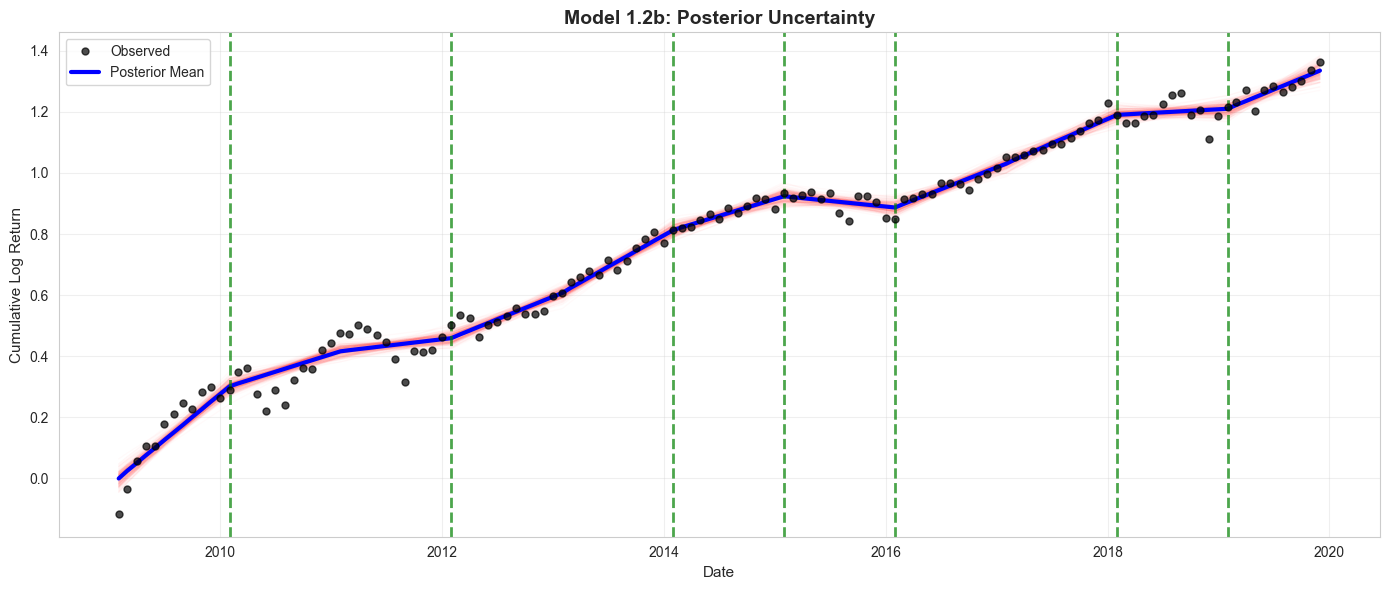


✓ Uncertainty plot saved to 'model_1_2b_uncertainty.png'


In [20]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2b.posterior["slope"].values.flatten()
intercept_samples = trace_1_2b.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2b.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2b: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2b_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'model_1_2b_uncertainty.png'")


In [21]:
# Create a nice summary table
print("\n" + "="*60)
print("MODEL 1.2B SUMMARY")
print("="*60)

print(f"\nGlobal Trend:")
print(f"  Baseline slope:     {slope_mean:.6f}")
print(f"  Baseline intercept: {intercept_mean:.6f}")
print(f"  Residual σ:         {sigma_mean:.6f}")
print(f"  Regularization τ:   {tau_mean:.6f}")

print(f"\nChangepoint Analysis:")
print(f"  Total potential CPs:  {n_changepoints}")
print(f"  Significant CPs:      {len(significant_cps)}")
print(f"  Proportion active:    {len(significant_cps)/n_changepoints:.1%}")

if len(significant_cps) > 0:
    print(f"\n  Active changepoints:")
    for cp_idx in significant_cps:
        year = 2009 + cp_idx + 1  # +1 because CP occurs at END of year
        adj = adjustments_mean[cp_idx]
        hdi_low = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_3%"]
        hdi_high = adjustment_summary.loc[f"adjustments[{cp_idx}]", "hdi_97%"]
        print(f"    Year {year}: adjustment = {adj:+.4f}, 94% HDI: [{hdi_low:+.4f}, {hdi_high:+.4f}]")

print("\n" + "="*60)


MODEL 1.2B SUMMARY

Global Trend:
  Baseline slope:     0.025149
  Baseline intercept: -0.000817
  Residual σ:         0.039116
  Regularization τ:   0.012060

Changepoint Analysis:
  Total potential CPs:  11
  Significant CPs:      7
  Proportion active:    63.6%

  Active changepoints:
    Year 2010: adjustment = -0.0156, 94% HDI: [-0.0220, -0.0080]
    Year 2012: adjustment = +0.0087, 94% HDI: [+0.0030, +0.0150]
    Year 2014: adjustment = -0.0079, 94% HDI: [-0.0140, -0.0020]
    Year 2015: adjustment = -0.0123, 94% HDI: [-0.0190, -0.0060]
    Year 2016: adjustment = +0.0150, 94% HDI: [+0.0090, +0.0210]
    Year 2018: adjustment = -0.0117, 94% HDI: [-0.0180, -0.0050]
    Year 2019: adjustment = +0.0108, 94% HDI: [+0.0020, +0.0190]



### Randomly placed changepoints

In [25]:
import pytensor.tensor as pt

t_max = float(t[-1])

with pm.Model() as model_1_2c:
    # Basic trend parameters
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # Define number of potential changepoints
    n_changepoints = 5  # Start with 5 flexible changepoints
    
    # Changepoint POSITIONS (anywhere in the time window)
    # Uniform prior: each changepoint can occur at any time
    changepoint_positions = pm.Uniform("cp_positions", 
                                       lower=0, 
                                       upper=t_max, 
                                       shape=n_changepoints)
    
    # Sort them so they're in chronological order
    # This is important for interpretability
    cp_sorted = pt.sort(changepoint_positions)
    
    # Slope adjustments with Laplace regularization
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # Build indicator matrix: has changepoint j occurred by time i?
    # cp_matrix[i, j] = 1 if t[i] >= cp_sorted[j], else 0
    cp_matrix = pm.math.ge(t[:, None], cp_sorted[None, :]).astype('float32')
    
    # Cumulative slope adjustments
    k = slope + pm.math.dot(cp_matrix, adjustments)
    
    # Intercept adjustments (maintain continuity)
    intercept_adjustments = -adjustments * cp_sorted
    m = intercept + pm.math.dot(cp_matrix, intercept_adjustments)
    
    # Trend
    mu_trend = k * t + m
    
    # Likelihood
    obs = pm.Normal("obs", mu=mu_trend, sigma=sigma, observed=cumulative_log_price)
    
    # Sample
    print("Sampling... (this may take 2-3 minutes due to Uniform priors)")
    trace_1_2c = pm.sample(2000, tune=2000,  # Need more tuning for Uniform priors
                           random_seed=42,
                           target_accept=0.95,  # Higher acceptance for better exploration
                           return_inferencedata=True,
                           idata_kwargs={"log_likelihood": True})

print("\n✓ Sampling complete!")

# Summary
print("\nPosterior Summary:")
az.summary(trace_1_2c, var_names=["slope", "intercept", "sigma", "tau"])

Initializing NUTS using jitter+adapt_diag...


Sampling... (this may take 2-3 minutes due to Uniform priors)


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, cp_positions, tau, adjustments]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 198 seconds.
Chain 0 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 3 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details



✓ Sampling complete!

Posterior Summary:


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
slope,0.043,0.018,0.015,0.069,0.008,0.003,7.0,28.0,1.61
intercept,-0.044,0.058,-0.122,0.066,0.026,0.012,7.0,28.0,1.56
sigma,0.039,0.003,0.034,0.045,0.001,0.000,18.0,95.0,1.15
tau,0.038,0.030,0.007,0.085,0.005,0.001,26.0,408.0,1.10



Visualizing flexible changepoints...

✓ Detected 1 significant changepoints

Changepoint Locations:
  CP 1: 2012-05-01 (month 39.3), adjustment = -0.0423 **SIGNIFICANT**
  CP 2: 2013-05-01 (month 51.7), adjustment = +0.0031 
  CP 3: 2013-12-01 (month 58.9), adjustment = -0.0019 
  CP 4: 2014-04-01 (month 62.4), adjustment = +0.0067 
  CP 5: 2015-04-01 (month 74.3), adjustment = -0.0011 


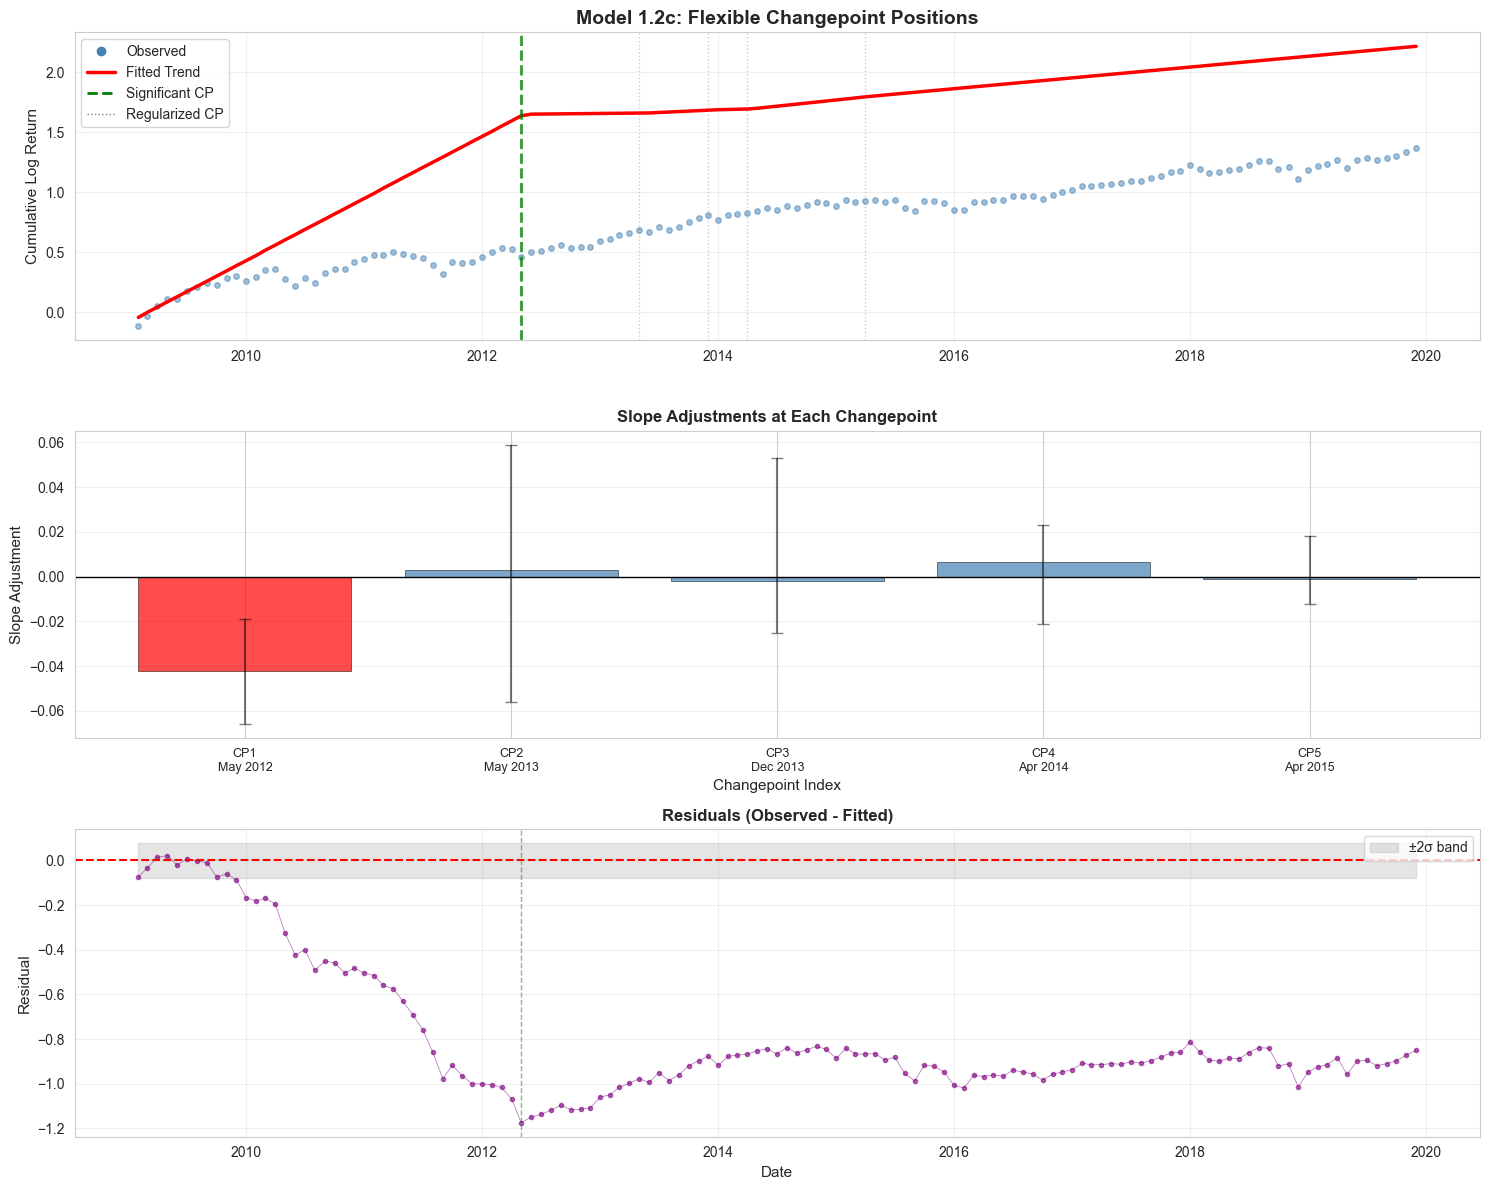


✓ Plots saved to 'model_1_2c_flexible_changepoints.png'


In [26]:
print("\nVisualizing flexible changepoints...")

# Extract posterior means
slope_mean = float(trace_1_2c.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2c.posterior["intercept"].mean().values)
sigma_mean = float(trace_1_2c.posterior["sigma"].mean().values)
tau_mean = float(trace_1_2c.posterior["tau"].mean().values)

# Get changepoint positions (sorted)
cp_positions_mean = trace_1_2c.posterior["cp_positions"].mean(dim=["chain", "draw"]).values
cp_positions_mean_sorted = np.sort(cp_positions_mean)

# Get adjustments
adjustments_mean = trace_1_2c.posterior["adjustments"].mean(dim=["chain", "draw"]).values

n_changepoints = len(adjustments_mean)

# Reconstruct fitted trend
cp_matrix = (t[:, None] >= cp_positions_mean_sorted[None, :]).astype(float)
k_fitted = slope_mean + np.dot(cp_matrix, adjustments_mean)
intercept_adj = -adjustments_mean * cp_positions_mean_sorted
m_fitted = intercept_mean + np.dot(cp_matrix, intercept_adj)
fitted_trend = k_fitted * t + m_fitted

# Create dates
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints
cp_summary = az.summary(trace_1_2c, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = cp_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = cp_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")

# Convert changepoint positions to dates
cp_dates = []
for cp_pos in cp_positions_mean_sorted:
    if cp_pos < len(dates_full):
        cp_dates.append(dates_full[int(cp_pos)])
    else:
        cp_dates.append(dates_full[-1])

# Print changepoint locations
print("\nChangepoint Locations:")
for i, (cp_date, adj) in enumerate(zip(cp_dates, adjustments_mean)):
    sig = "**SIGNIFICANT**" if i in significant_cps else ""
    print(f"  CP {i+1}: {cp_date.date()} (month {cp_positions_mean_sorted[i]:.1f}), "
          f"adjustment = {adj:+.4f} {sig}")

# ============= CREATE PLOTS =============
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# PLOT 1: Data and Fitted Trend
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark ALL changepoints (color-coded by significance)
for i, cp_date in enumerate(cp_dates):
    if i in significant_cps:
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.8, linewidth=2)
    else:
        axes[0].axvline(cp_date, color='gray', linestyle=':', alpha=0.4, linewidth=1)

# Custom legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='steelblue', marker='o', linestyle='', label='Observed'),
    Line2D([0], [0], color='red', linewidth=2.5, label='Fitted Trend'),
    Line2D([0], [0], color='green', linestyle='--', linewidth=2, label='Significant CP'),
    Line2D([0], [0], color='gray', linestyle=':', linewidth=1, label='Regularized CP')
]
axes[0].legend(handles=legend_elements, loc='upper left')

axes[0].set_title('Model 1.2c: Flexible Changepoint Positions', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].grid(True, alpha=0.3)

# PLOT 2: Adjustment Magnitudes
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]
x_positions = np.arange(1, n_changepoints + 1)

axes[1].bar(x_positions, adjustments_mean, alpha=0.7, color=colors, 
            edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars
hdi_low = [cp_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [cp_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(x_positions, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(x_positions)
axes[1].grid(True, alpha=0.3, axis='y')

# Add date labels below
cp_date_labels = [f"{d.strftime('%b %Y')}" for d in cp_dates]
axes[1].set_xticklabels([f"CP{i+1}\n{label}" for i, label in enumerate(cp_date_labels)], 
                        fontsize=9)

# PLOT 3: Residuals
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, 
             color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, 
                     alpha=0.2, color='gray', label='±2σ band')

# Mark significant changepoints
for i, cp_date in enumerate(cp_dates):
    if i in significant_cps:
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2c_flexible_changepoints.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'model_1_2c_flexible_changepoints.png'")


Model 1.2c: Flexible Changepoint Positions - Convergence Failure

The flexible changepoint model (Model 1.2c) encountered severe convergence issues, as evidenced by:

- r̂ values exceeding 1.5 for key parameters (slope, intercept), well above the acceptable threshold of 1.01

- Extremely low effective sample sizes (ESS bulk: 7-28), indicating high autocorrelation and poor mixing

- Maximum tree depth warnings across all chains, suggesting the posterior geometry is difficult for NUTS to navigate

Root Cause: The model suffers from non-identifiability—with 5 changepoint positions free to move anywhere in the time window, the posterior becomes highly multimodal and "funnel-shaped." Different combinations of changepoint positions and adjustments can produce similar fits, causing NUTS to get stuck exploring narrow ridges in parameter space.

The fitted trend (red line in Plot 1) completely fails to capture the data structure, confirming that the sampler failed to find the true posterior mode. This demonstrates a fundamental limitation: increasing model flexibility does not always improve inference, especially with limited data (131 observations).

Conclusion: While theoretically more flexible than fixed-position changepoints (Model 1.2b), Model 1.2c is not practically viable for this dataset. This failure motivates retaining Model 1.2b's fixed yearly changepoints, which achieved excellent convergence (r̂=1.0, ESS>3700) and a plausible fit. This illustrates an important principle in Bayesian modeling: structure and constraints can aid inference by reducing the complexity of the posterior geometry.

### Analysis of residuals

We build upon model_1_2b and we test whether residuals are better modeled by Student-t than Normal distribution

Model definition

In [27]:
print("\nModel 1.2d: Multiple Changepoints + Student-t Residuals")
print("-" * 60)


with pm.Model() as model_1_2d:
    # SAME trend structure as Model 1.2b
    slope = pm.Normal("slope", mu=0, sigma=1)
    intercept = pm.Normal("intercept", mu=0, sigma=0.1)
    sigma = pm.HalfNormal("sigma", sigma=1)
    
    # SAME changepoint structure
    n_changepoints = int(np.ceil(len(returns_monthly) / 12))
    tau = pm.HalfNormal("tau", sigma=0.5)
    adjustments = pm.Laplace("adjustments", mu=0, b=tau, shape=n_changepoints)
    
    # SAME changepoint logic
    changepoint_times = np.arange(1, n_changepoints + 1) * 12
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    
    # SAME trend calculation
    k = slope + pm.math.dot(changepoint_matrix, adjustments)
    intercept_adjustments = -adjustments * changepoint_times
    m = intercept + pm.math.dot(changepoint_matrix, intercept_adjustments)
    mu_trend = k * t + m
    
    # KEY CHANGE: Student-t likelihood instead of Normal
    nu = pm.Exponential("nu", lam=1/10)  # Degrees of freedom (fat tails)
    obs = pm.StudentT("obs", mu=mu_trend, sigma=sigma, nu=nu, observed=cumulative_log_price)
    
    # Sample
    print("Sampling Model 1.2d (Student-t)...")
    trace_1_2d = pm.sample(2000, tune=1000, random_seed=42,
                          return_inferencedata=True,
                          idata_kwargs={"log_likelihood": True})

print("\n✓ Model 1.2d sampling complete!")

# Summary
print("\nModel 1.2d Posterior Summary:")
print(az.summary(trace_1_2d, var_names=["slope", "intercept", "sigma", "tau", "nu"]))

Initializing NUTS using jitter+adapt_diag...



Model 1.2d: Multiple Changepoints + Student-t Residuals
------------------------------------------------------------
Sampling Model 1.2d (Student-t)...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept, sigma, tau, adjustments, nu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 78 seconds.



✓ Model 1.2d sampling complete!

Model 1.2d Posterior Summary:
            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope      0.024  0.003   0.018    0.029      0.000    0.000    3292.0   
intercept  0.025  0.024  -0.019    0.072      0.000    0.000    3732.0   
sigma      0.028  0.004   0.020    0.035      0.000    0.000    4676.0   
tau        0.012  0.005   0.005    0.021      0.000    0.000    4296.0   
nu         4.565  2.931   1.525    9.032      0.046    0.121    4905.0   

           ess_tail  r_hat  
slope        3587.0    1.0  
intercept    4331.0    1.0  
sigma        5047.0    1.0  
tau          4075.0    1.0  
nu           4476.0    1.0  


Model comparison

In [28]:
print("\n" + "="*60)
print("MODEL COMPARISON: Normal vs Student-t")
print("="*60)

# Compare models
comparison = az.compare({"Normal (1.2b)": trace_1_2b, 
                        "Student-t (1.2d)": trace_1_2d}, 
                       ic="waic")

print("\nWAIC Comparison:")
print(comparison)

# Interpret the difference
elpd_diff = comparison.loc["Student-t (1.2d)", "elpd_diff"] if comparison.index[0] == "Normal (1.2b)" else comparison.loc["Normal (1.2b)", "elpd_diff"]
winner = "Student-t" if comparison.index[0] == "Student-t (1.2d)" else "Normal"

print(f"\n{'='*60}")
print(f"RESULT: {winner} model is preferred")
print(f"ELPD difference: {abs(elpd_diff):.2f}")

if abs(elpd_diff) < 1:
    interpretation = "Negligible difference - models perform similarly"
elif abs(elpd_diff) < 4:
    interpretation = "Small but meaningful preference"
else:
    interpretation = "Strong preference"

print(f"Interpretation: {interpretation}")
print(f"{'='*60}\n")

# Extract nu (degrees of freedom)
nu_mean = trace_1_2d.posterior["nu"].mean().values
nu_hdi = az.hdi(trace_1_2d.posterior["nu"], hdi_prob=0.94)

print(f"Student-t degrees of freedom (ν):")
print(f"  Mean: {nu_mean:.2f}")
print(f"  94% HDI: [{nu_hdi['nu'].values[0]:.2f}, {nu_hdi['nu'].values[1]:.2f}]")

if nu_mean < 5:
    tail_interpretation = "Very fat tails (heavy tail risk)"
elif nu_mean < 10:
    tail_interpretation = "Moderately fat tails"
elif nu_mean < 30:
    tail_interpretation = "Slightly fatter than Normal"
else:
    tail_interpretation = "Approximately Normal (ν > 30)"

print(f"  Interpretation: {tail_interpretation}")



MODEL COMPARISON: Normal vs Student-t

WAIC Comparison:
                  rank   elpd_waic     p_waic  elpd_diff    weight         se  \
Student-t (1.2d)     0  237.903025  17.352796   0.000000  0.857328  11.660581   
Normal (1.2b)        1  232.024288  13.372287   5.878737  0.142672  11.719356   

                       dse  warning scale  
Student-t (1.2d)  0.000000     True   log  
Normal (1.2b)     4.037453     True   log  

RESULT: Student-t model is preferred
ELPD difference: 5.88
Interpretation: Strong preference

Student-t degrees of freedom (ν):
  Mean: 4.57
  94% HDI: [1.53, 9.03]
  Interpretation: Very fat tails (heavy tail risk)


/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/Users/macbookpro/Desktop/AI Programming/Project/AI_Programming_Project/pymc_env/lib/python3.13/site-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Residuals Q-Q Plot comparison


Generating Q-Q plots for residuals comparison...


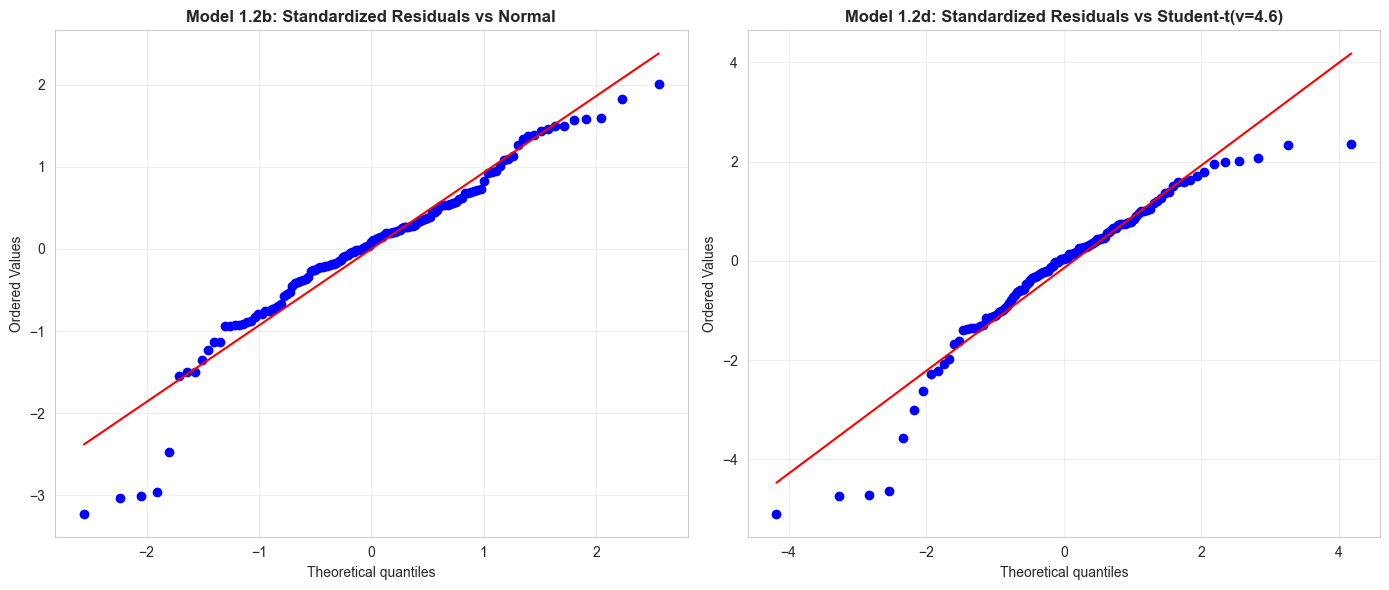


✓ Q-Q plots saved to 'model_1_2d_qq_comparison.png'


In [29]:
print("\nGenerating Q-Q plots for residuals comparison...")

# Extract fitted trends for both models
def extract_fitted_trend(trace, t, changepoint_times):
    """Extract mean fitted trend from trace"""
    slope_mean = float(trace.posterior["slope"].mean().values)
    intercept_mean = float(trace.posterior["intercept"].mean().values)
    adjustments_mean = trace.posterior["adjustments"].mean(dim=["chain", "draw"]).values
    
    changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)
    k = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
    intercept_adj = -adjustments_mean * changepoint_times
    m = intercept_mean + np.dot(changepoint_matrix, intercept_adj)
    
    return k * t + m

# Get fitted trends
fitted_1_2b = extract_fitted_trend(trace_1_2b, t, changepoint_times)
fitted_1_2d = extract_fitted_trend(trace_1_2d, t, changepoint_times)

# Calculate residuals
residuals_1_2b = cumulative_log_price - fitted_1_2b
residuals_1_2d = cumulative_log_price - fitted_1_2d

# Standardize residuals
sigma_1_2b = float(trace_1_2b.posterior["sigma"].mean().values)
sigma_1_2d = float(trace_1_2d.posterior["sigma"].mean().values)

std_residuals_1_2b = residuals_1_2b / sigma_1_2b
std_residuals_1_2d = residuals_1_2d / sigma_1_2d

# Create Q-Q plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Normal residuals vs Normal distribution
stats.probplot(std_residuals_1_2b, dist="norm", plot=axes[0])
axes[0].set_title('Model 1.2b: Standardized Residuals vs Normal', 
                  fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Student-t residuals vs Student-t distribution
stats.probplot(std_residuals_1_2d, dist="t", sparams=(nu_mean,), plot=axes[1])
axes[1].set_title(f'Model 1.2d: Standardized Residuals vs Student-t(ν={nu_mean:.1f})', 
                  fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2d_qq_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Q-Q plots saved to 'model_1_2d_qq_comparison.png'")


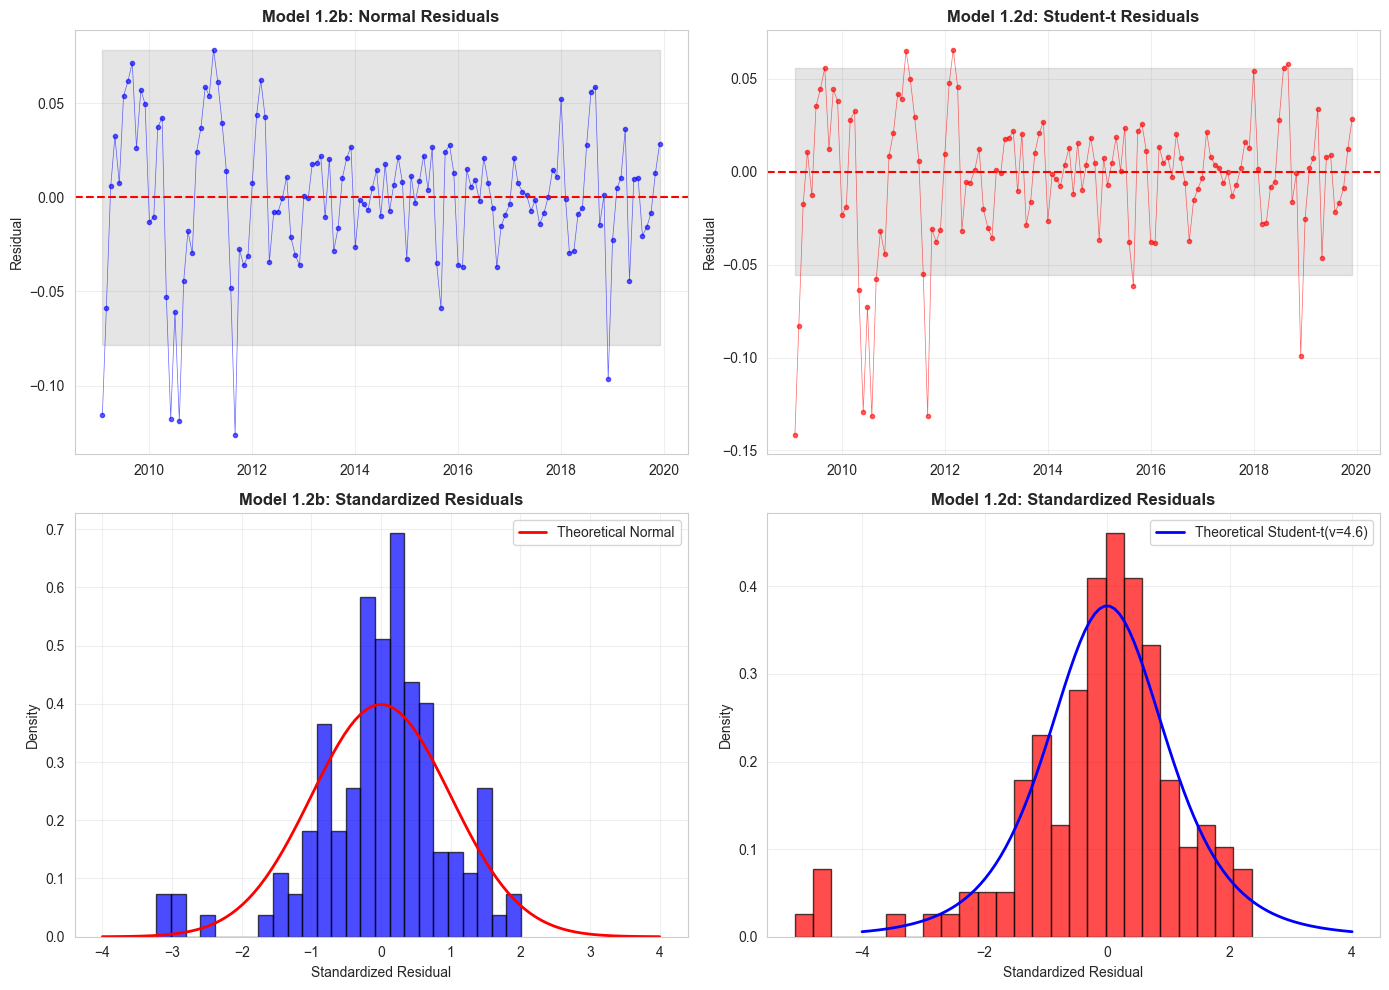


✓ Residuals comparison saved to 'model_1_2d_residuals_comparison.png'


In [30]:
# Additional visualization: Histogram comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top row: Residuals over time
axes[0, 0].plot(dates_monthly, residuals_1_2b, 'o-', alpha=0.6, markersize=3, 
                color='blue', linewidth=0.5)
axes[0, 0].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 0].fill_between(dates_monthly, -2*sigma_1_2b, 2*sigma_1_2b, 
                        alpha=0.2, color='gray')
axes[0, 0].set_title('Model 1.2b: Normal Residuals', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Residual')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(dates_monthly, residuals_1_2d, 'o-', alpha=0.6, markersize=3, 
                color='red', linewidth=0.5)
axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[0, 1].fill_between(dates_monthly, -2*sigma_1_2d, 2*sigma_1_2d, 
                        alpha=0.2, color='gray')
axes[0, 1].set_title('Model 1.2d: Student-t Residuals', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Residual')
axes[0, 1].grid(True, alpha=0.3)

# Bottom row: Histograms
axes[1, 0].hist(std_residuals_1_2b, bins=25, alpha=0.7, color='blue', 
                edgecolor='black', density=True)
x_range = np.linspace(-4, 4, 100)
axes[1, 0].plot(x_range, stats.norm.pdf(x_range), 'r-', linewidth=2, 
                label='Theoretical Normal')
axes[1, 0].set_title('Model 1.2b: Standardized Residuals', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Standardized Residual')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(std_residuals_1_2d, bins=25, alpha=0.7, color='red', 
                edgecolor='black', density=True)
axes[1, 1].plot(x_range, stats.t.pdf(x_range, nu_mean), 'b-', linewidth=2, 
                label=f'Theoretical Student-t(ν={nu_mean:.1f})')
axes[1, 1].set_title('Model 1.2d: Standardized Residuals', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Standardized Residual')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2d_residuals_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Residuals comparison saved to 'model_1_2d_residuals_comparison.png'")


Model 1.2d Results: Evidence for Fat Tails Beyond Structural Breaks

Model comparison via WAIC strongly favors the Student-t residual model over the Normal residual model (elpd_diff = 5.88, weight = 85.7%), indicating a strong preference for the fat-tailed specification even after accounting for trend and changepoints.

The estimated degrees of freedom parameter (ν = 4.57, 94% HDI: [1.53, 9.03]) indicates very heavy tails, substantially lower than would be expected for monthly financial returns. This finding suggests that:

- Changepoints alone are insufficient: While Model 1.2b successfully identified regime changes in the trend, it does not fully capture the extreme deviations observed in the data.

- Structural vs. stochastic risk: The low ν value indicates that even after removing deterministic structural breaks, the residuals exhibit fat-tailed behavior characteristic of stochastic volatility clustering.

- Q-Q plot improvement: The Q-Q plot for Model 1.3 shows substantial improvement over Model 1.2b, with points adhering more closely to the theoretical Student-t line, particularly in the middle 90% of the distribution. However, slight deviations remain in the extreme tails, suggesting the presence of additional dynamics (e.g., time-varying volatility) not captured by a constant-parameter Student-t distribution.

Implication: The persistent fat tails after accounting for changepoints provide strong motivation for Model 1.4, which will introduce time-varying volatility to capture the dynamic nature of risk in financial returns.

Model 1.2d plots:


Visualizing Model 1.2d results...

✓ Detected 8 significant changepoints
  At year indices: [0, 1, 2, 4, 5, 6, 8, 9]


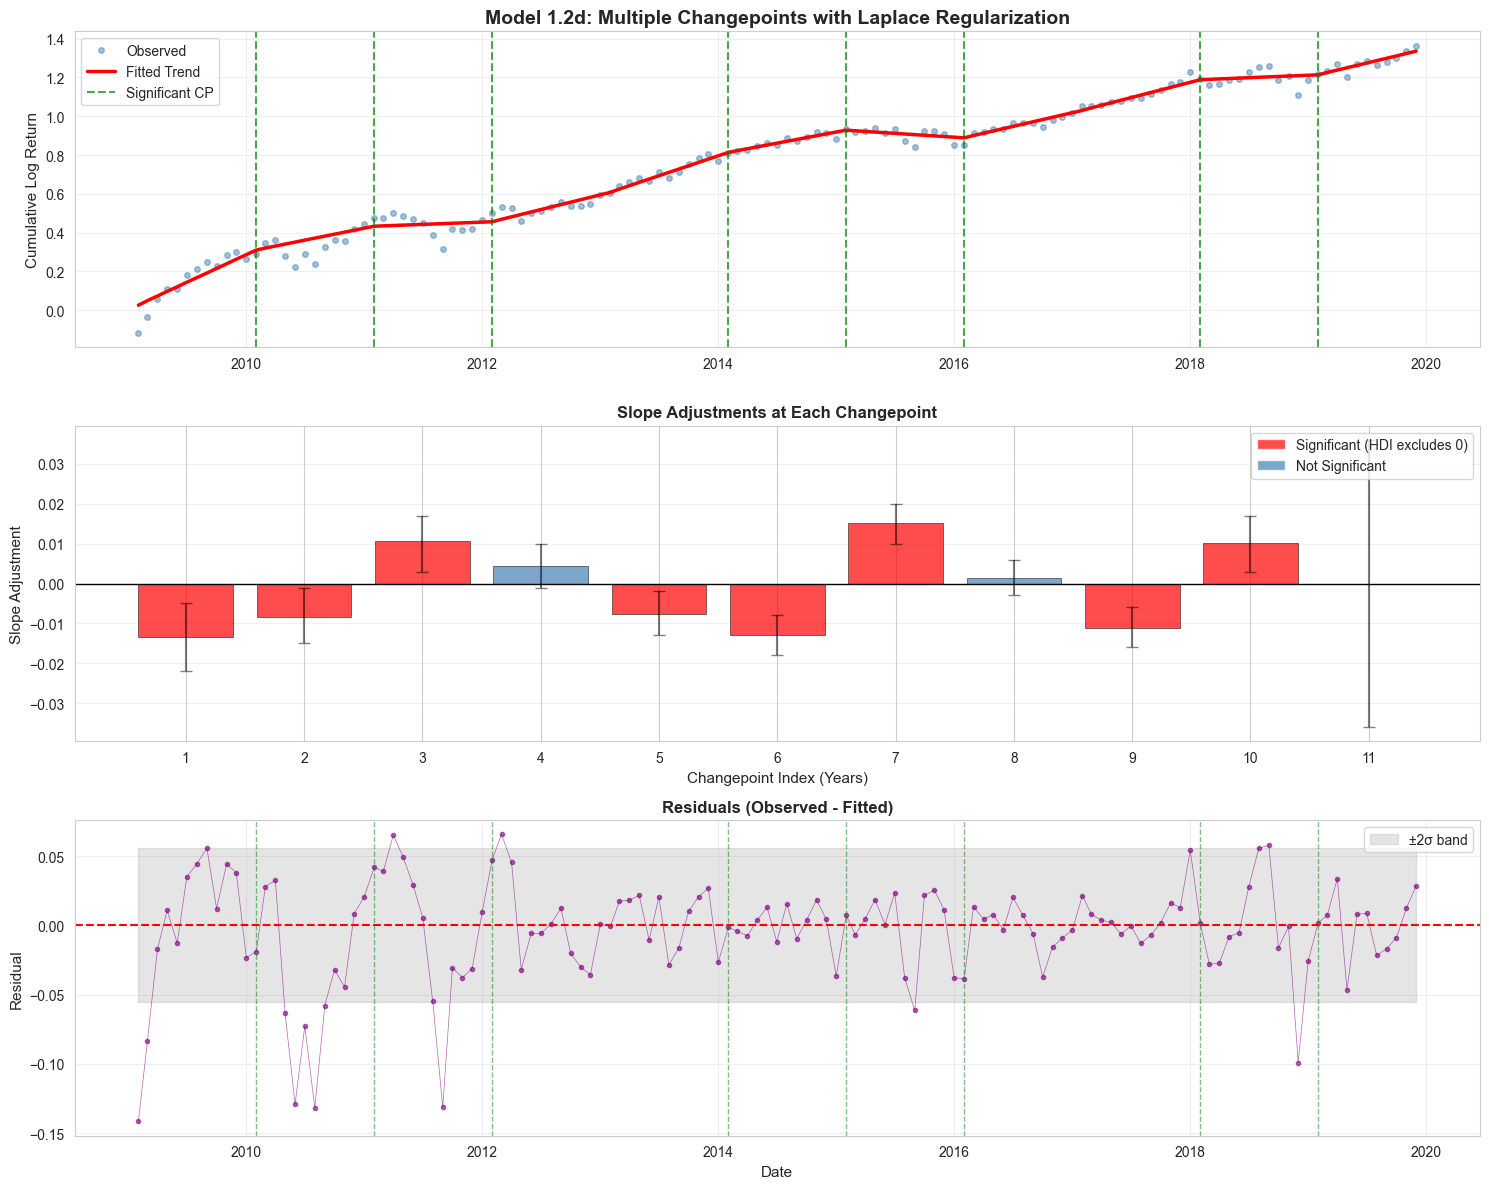


✓ Plots saved to 'model_1_2d_full_analysis.png'


In [33]:
print("\nVisualizing Model 1.2d results...")

# Extract posterior means
slope_mean = float(trace_1_2d.posterior["slope"].mean().values)
intercept_mean = float(trace_1_2d.posterior["intercept"].mean().values)
tau_mean = float(trace_1_2d.posterior["tau"].mean().values)
sigma_mean = float(trace_1_2d.posterior["sigma"].mean().values)

# For adjustments, we need to extract the array properly
adjustments_mean = trace_1_2d.posterior["adjustments"].mean(dim=["chain", "draw"]).values

changepoint_times = np.arange(1, n_changepoints + 1) * 12
changepoint_matrix = (t[:, None] >= changepoint_times[None, :]).astype(float)

# Compute k and m
k_fitted = slope_mean + np.dot(changepoint_matrix, adjustments_mean)
intercept_adjustments = -adjustments_mean * changepoint_times
m_fitted = intercept_mean + np.dot(changepoint_matrix, intercept_adjustments)

# Final trend
fitted_trend = k_fitted * t + m_fitted

# Create date range for x-axis
dates_full = pd.date_range(start=dates_monthly[0], periods=len(cumulative_log_price), freq='MS')

# Determine significant changepoints (where 94% HDI excludes zero)
adjustment_summary = az.summary(trace_1_2d, var_names=["adjustments"])
significant_cps = []

for i in range(n_changepoints):
    hdi_low = adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"]
    hdi_high = adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"]
    if not (hdi_low < 0 < hdi_high):  # HDI doesn't include zero
        significant_cps.append(i)

print(f"\n✓ Detected {len(significant_cps)} significant changepoints")
print(f"  At year indices: {significant_cps}")

# Create figure with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

# ============= PLOT 1: Data and Fitted Trend =============
axes[0].plot(dates_full, cumulative_log_price, 'o', alpha=0.5, 
             label='Observed', markersize=4, color='steelblue')
axes[0].plot(dates_full, fitted_trend, 'r-', linewidth=2.5, label='Fitted Trend')

# Mark significant changepoints with vertical lines
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[0].axvline(cp_date, color='green', linestyle='--', alpha=0.7, 
                       linewidth=1.5, label='Significant CP' if cp_idx == significant_cps[0] else '')

axes[0].set_title('Model 1.2d: Multiple Changepoints with Laplace Regularization', 
                  fontsize=14, fontweight='bold')
axes[0].set_ylabel('Cumulative Log Return', fontsize=11)
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# ============= PLOT 2: Adjustment Magnitudes =============
years = np.arange(1, n_changepoints + 1)
colors = ['red' if i in significant_cps else 'steelblue' for i in range(n_changepoints)]

axes[1].bar(years, adjustments_mean, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
axes[1].axhline(0, color='black', linestyle='-', linewidth=1)

# Add error bars (94% HDI)
hdi_low = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_3%"] for i in range(n_changepoints)]
hdi_high = [adjustment_summary.loc[f"adjustments[{i}]", "hdi_97%"] for i in range(n_changepoints)]
errors = [adjustments_mean - hdi_low, hdi_high - adjustments_mean]
axes[1].errorbar(years, adjustments_mean, yerr=errors, fmt='none', 
                ecolor='black', alpha=0.5, capsize=4)

axes[1].set_title('Slope Adjustments at Each Changepoint', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Changepoint Index (Years)', fontsize=11)
axes[1].set_ylabel('Slope Adjustment', fontsize=11)
axes[1].set_xticks(years)
axes[1].grid(True, alpha=0.3, axis='y')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='red', alpha=0.7, label='Significant (HDI excludes 0)'),
                   Patch(facecolor='steelblue', alpha=0.7, label='Not Significant')]
axes[1].legend(handles=legend_elements, loc='upper right')

# ============= PLOT 3: Residuals =============
residuals = cumulative_log_price - fitted_trend

axes[2].plot(dates_full, residuals, 'o-', alpha=0.6, markersize=3, color='purple', linewidth=0.5)
axes[2].axhline(0, color='red', linestyle='--', linewidth=1.5)
axes[2].fill_between(dates_full, -2*sigma_mean, 2*sigma_mean, alpha=0.2, color='gray', 
                     label='±2σ band')

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        axes[2].axvline(cp_date, color='green', linestyle='--', alpha=0.5, linewidth=1)

axes[2].set_title('Residuals (Observed - Fitted)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Residual', fontsize=11)
axes[2].set_xlabel('Date', fontsize=11)
axes[2].legend(loc='upper right')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2d_full_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Plots saved to 'model_1_2d_full_analysis.png'")


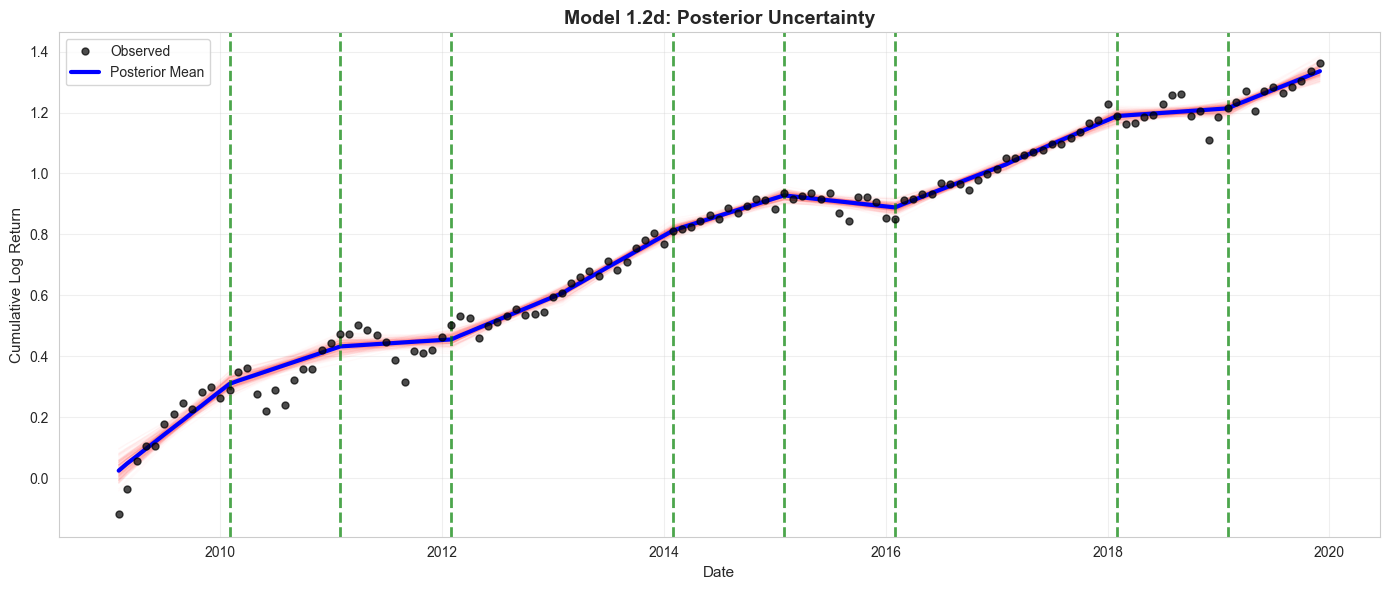


✓ Uncertainty plot saved to 'model_1_2d_uncertainty.png'


In [34]:
# Show uncertainty bands around the fitted trend
fig, ax = plt.subplots(figsize=(14, 6))

# Get posterior samples (not just means)
slope_samples = trace_1_2d.posterior["slope"].values.flatten()
intercept_samples = trace_1_2d.posterior["intercept"].values.flatten()
adjustments_samples = trace_1_2d.posterior["adjustments"].values.reshape(-1, n_changepoints)

# Sample 200 random posterior draws
n_samples = 200
sample_indices = np.random.choice(len(slope_samples), n_samples, replace=False)

# Plot observed data
ax.plot(dates_full, cumulative_log_price, 'o', alpha=0.7, 
        label='Observed', markersize=5, color='black', zorder=3)

# Plot posterior samples (uncertainty)
for idx in sample_indices:
    k_sample = slope_samples[idx] + np.dot(changepoint_matrix, adjustments_samples[idx])
    intercept_adj = -adjustments_samples[idx] * changepoint_times
    m_sample = intercept_samples[idx] + np.dot(changepoint_matrix, intercept_adj)
    trend_sample = k_sample * t + m_sample
    
    ax.plot(dates_full, trend_sample, 'r-', alpha=0.02, linewidth=1, zorder=1)

# Plot posterior mean on top
ax.plot(dates_full, fitted_trend, 'b-', linewidth=3, label='Posterior Mean', zorder=2)

# Mark significant changepoints
for cp_idx in significant_cps:
    cp_time = changepoint_times[cp_idx]
    if cp_time < len(dates_full):
        cp_date = dates_full[cp_time]
        ax.axvline(cp_date, color='green', linestyle='--', alpha=0.7, linewidth=2)

ax.set_title('Model 1.2d: Posterior Uncertainty', fontsize=14, fontweight='bold')
ax.set_ylabel('Cumulative Log Return', fontsize=11)
ax.set_xlabel('Date', fontsize=11)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('model_1_2d_uncertainty.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Uncertainty plot saved to 'model_1_2d_uncertainty.png'")
